In [ ]:
pip install pycaret-ts-alpha

     |████████████████████████████████| 468 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.0 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 2.0 MB/s 
     |████████████████████████████████| 1.4 MB 36.2 MB/s 
     |████████████████████████████████| 11.2 MB 45.1 MB/s 
     |████████████████████████████████| 303 kB 48.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 2.0 MB 36.0 MB/s 
     |████████████████████████████████| 6.5 MB 31.9 MB/s 
     |████████████████████████████████| 79.9 MB 107 kB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 120 kB 48.6 MB/s 
     |████████████████████████████████| 930 kB 37.7 MB/s 
     |████████████████████████████████| 34.5 MB 32.0 MB/s 
  Created wheel for pyod: filename=pyod-1.0.1-py3-none-any.whl size=147473 sha256=f5a21b2a6a713fec3d95626e96ae290e7fea989e85bc5b275a5b

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Importar todos as bases de dados (banco de dados de 2021 atualizado e 2022 até fevereiro)

df_list = []
data = []
anos_list = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
index_inicial = anos_list[0]
index_contador = 0

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['df%s' % concatenate_index] = pd.DataFrame(data)

  csv_string = "/content/drive/My Drive/acidentes/por_ocorrencia/datatran" + str(index_inicial) + ".csv"
  index_inicial = index_inicial + 1
  df_list.append(pd.read_csv(csv_string, sep=";", encoding="latin-1"))
  
for df in df_list:
 locals()["df"+str(anos_list[0] + index_contador)] = df
 locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"] = pd.to_datetime(locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"])
 locals()["df"+str(anos_list[0] + index_contador)] = locals()["df"+str(anos_list[0] + index_contador)].sort_values(by=['data_inversa'])
 index_contador = index_contador + 1

Mounted at /content/drive


In [ ]:
# Quantidade de Acidentes por dia a cada Ano (banco de dados de 2021 atualizado e 2022 até fevereiro)

auxilio_exec = anos_list[0] + len(anos_list) - 1          # Necessário para poder executar o código sem que plataforma reclame de variável não criada

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['dfAcidentes%s' % concatenate_index] = pd.DataFrame(data)

  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["df"+str(anos_list[0] + x)]['data_inversa'].value_counts()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].to_frame()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].sort_index()
  if anos_list[0] + x >= anos_list[1]:
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].append(locals()["dfAcidentes"+str(anos_list[0] + x - 1)])
  elif x == len(anos_list):
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].dropna()

locals()['dfAcidentes%s' % auxilio_exec]        # Em nosso caso específico, essa variável também pode ser escrita como dfAcidentes2022

# Transformar em valores mensais utilizando o somatório
df2022AcidentesM = locals()["dfAcidentes2022"].resample(rule='M').sum()
df2022AcidentesM = df2022AcidentesM.reset_index(level=0)
df2022AcidentesM = df2022AcidentesM.rename(columns={"index": "Date", "data_inversa": "Acidentes"})
df2022AcidentesM

,Date,Acidentes
0,2007-01-31,10611
1,2007-02-28,9624
2,2007-03-31,9997
3,2007-04-30,10191
4,2007-05-31,10490
...,...,...
177,2021-10-31,5756
178,2021-11-30,5084
179,2021-12-31,5802
180,2022-01-31,5018


In [ ]:
df2022AcidentesM['MA12'] = df2022AcidentesM['Acidentes'].rolling(12).mean()
df2022AcidentesM['Month'] = [i.month for i in df2022AcidentesM['Date']]
df2022AcidentesM['Year'] = [i.year for i in df2022AcidentesM['Date']]
df2022AcidentesM['Series'] = np.arange(1,len(df2022AcidentesM)+1)
df2022AcidentesM

,Date,Acidentes,MA12,Month,Year,Series
0,2007-01-31,10611,NaN,1,2007,1
1,2007-02-28,9624,NaN,2,2007,2
2,2007-03-31,9997,NaN,3,2007,3
3,2007-04-30,10191,NaN,4,2007,4
4,2007-05-31,10490,NaN,5,2007,5
...,...,...,...,...,...,...
177,2021-10-31,5756,5458.000000,10,2021,178
178,2021-11-30,5084,5402.916667,11,2021,179
179,2021-12-31,5802,5370.083333,12,2021,180
180,2022-01-31,5018,5333.416667,1,2022,181


In [ ]:
df2022AcidentesM.drop(['MA12'], axis=1, inplace=True)
df2022AcidentesM = df2022AcidentesM[['Series', 'Year', 'Month', 'Acidentes']]
df2022AcidentesM

,Series,Year,Month,Acidentes
0,1,2007,1,10611
1,2,2007,2,9624
2,3,2007,3,9997
3,4,2007,4,10191
4,5,2007,5,10490
...,...,...,...,...
177,178,2021,10,5756
178,179,2021,11,5084
179,180,2021,12,5802
180,181,2022,1,5018


In [ ]:
train = df2022AcidentesM[df2022AcidentesM['Year'] < 2020]
test = df2022AcidentesM[df2022AcidentesM['Year'] >= 2020]

In [ ]:
train

,Series,Year,Month,Acidentes
0,1,2007,1,10611
1,2,2007,2,9624
2,3,2007,3,9997
3,4,2007,4,10191
4,5,2007,5,10490
...,...,...,...,...
151,152,2019,8,5703
152,153,2019,9,5868
153,154,2019,10,5881
154,155,2019,11,5802


In [ ]:
test

,Series,Year,Month,Acidentes
156,157,2020,1,5497
157,158,2020,2,5467
158,159,2020,3,4790
159,160,2020,4,3883
160,161,2020,5,4657
161,162,2020,6,4734
162,163,2020,7,5127
163,164,2020,8,5643
164,165,2020,9,5689
165,166,2020,10,6120


In [ ]:
from pycaret.regression import *

In [ ]:
s = setup(data = train, test_data = test, target = 'Acidentes', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = False, session_id = 123, n_jobs=1)

,Description,Value
0,Session id,123
1,Target,Acidentes
2,Target type,regression
3,Data shape,"(182, 4)"
4,Train data shape,"(182, 4)"
5,Test data shape,"(26, 4)"
6,Numeric features,2
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
best = compare_models(sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2227.8886,1.187961e+07,2475.4334,-1.9252,0.2467,0.2848,0.0533
rf,Random Forest Regressor,2245.8201,1.208847e+07,2499.0278,-1.9327,0.2464,0.2865,0.1500
knn,K Neighbors Regressor,2249.1244,1.140526e+07,2532.7274,-2.3488,0.2584,0.2954,0.0233
et,Extra Trees Regressor,2316.3337,1.218349e+07,2570.2953,-2.3504,0.2601,0.3007,0.1167
ada,AdaBoost Regressor,2399.2759,1.376256e+07,2664.8026,-2.3535,0.2593,0.3052,0.0867
dt,Decision Tree Regressor,2415.7704,1.284576e+07,2686.2392,-2.5973,0.2679,0.3056,0.0200
lightgbm,Light Gradient Boosting Machine,3178.0827,1.733076e+07,3396.1250,-7.5527,0.3422,0.4187,0.0300
par,Passive Aggressive Regressor,3836.7420,2.543733e+07,4079.2932,-9.5335,0.3874,0.4916,0.0200
dummy,Dummy Regressor,4993.5581,2.978670e+07,5219.0292,-74.3344,0.5321,0.7203,0.0200
llar,Lasso Least Angle Regression,5192.5954,3.937533e+07,5568.3574,-26.2394,0.5018,0.6759,0.0233


In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,122.6993,31882.8646,178.5577,0.8805,0.0373,0.0244


In [ ]:
pip install plotly matplotlib seaborn

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# generate predictions on the original dataset
predictions = predict_model(best, data=df2022AcidentesM)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2007-01-01', end = '2022-02-01', freq = 'MS')

In [ ]:
extracted_col = df2022AcidentesM["Acidentes"]
predictions = predictions.join(extracted_col)
predictions

,Series,Year,Month,Label,Date,Acidentes
0,1,2007,1,10593.267284,2007-01-01,10611
1,2,2007,2,9575.551045,2007-02-01,9624
2,3,2007,3,10189.131960,2007-03-01,9997
3,4,2007,4,10273.719381,2007-04-01,10191
4,5,2007,5,10558.708190,2007-05-01,10490
...,...,...,...,...,...,...
177,178,2021,10,5717.619003,2021-10-01,5756
178,179,2021,11,5217.024412,2021-11-01,5084
179,180,2021,12,5842.428524,2021-12-01,5802
180,181,2022,1,5035.485467,2022-01-01,5018


In [ ]:
#test_data["Acidentes"]["2020-01-31":"2022-02-28"]
#df[df['data_inversa']=='2020-10-10'].tipo_acidente.value_counts()
#predictions[predictions["Date"]=="2022-02-01"]
predictions[predictions["Date"]>="2020-01-01"]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.738440,2020-01-01,5497
157,158,2020,2,5241.188381,2020-02-01,5467
158,159,2020,3,4811.755713,2020-03-01,4790
159,160,2020,4,4458.048002,2020-04-01,3883
160,161,2020,5,4732.531054,2020-05-01,4657
161,162,2020,6,4874.208398,2020-06-01,4734
162,163,2020,7,5271.692403,2020-07-01,5127
163,164,2020,8,5632.740352,2020-08-01,5643
164,165,2020,9,5643.189490,2020-09-01,5689
165,166,2020,10,5757.815475,2020-10-01,6120


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions[predictions["Date"]>="2020-01-01"].Acidentes, predictions[predictions["Date"]>="2020-01-01"].Label)

122.69931803101288

In [ ]:
predictions[predictions["Date"]>="2020-01-01"]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.738440,2020-01-01,5497
157,158,2020,2,5241.188381,2020-02-01,5467
158,159,2020,3,4811.755713,2020-03-01,4790
159,160,2020,4,4458.048002,2020-04-01,3883
160,161,2020,5,4732.531054,2020-05-01,4657
161,162,2020,6,4874.208398,2020-06-01,4734
162,163,2020,7,5271.692403,2020-07-01,5127
163,164,2020,8,5632.740352,2020-08-01,5643
164,165,2020,9,5643.189490,2020-09-01,5689
165,166,2020,10,5757.815475,2020-10-01,6120


In [ ]:
#predictions[predictions["Date"]>="2020-01-01"].Label.sum()
print("Acidentes:",predictions[predictions["Date"]>="2020-01-01"].Acidentes.sum(),"/ Predição:",predictions[predictions["Date"]>="2020-01-01"].Label.sum())
print("Diferença:",predictions[predictions["Date"]>="2020-01-01"].Label.sum()-predictions[predictions["Date"]>="2020-01-01"].Acidentes.sum(),"acidentes")

Acidentes: 137830 / Predição: 137973.95162610075
Diferença: 143.95162610075204 acidentes


In [ ]:
predictions.Acidentes

0      10611
1       9624
2       9997
3      10191
4      10490
       ...  
177     5756
178     5084
179     5802
180     5018
181     4823
Name: Acidentes, Length: 182, dtype: int64

In [ ]:
predictions.Label

0      10593.267284
1       9575.551045
2      10189.131960
3      10273.719381
4      10558.708190
           ...     
177     5717.619003
178     5217.024412
179     5842.428524
180     5035.485467
181     4817.203825
Name: Label, Length: 182, dtype: float64

In [ ]:
predictions.Acidentes.sum()

1926334

In [ ]:
predictions.Label.sum()

1926334.0

In [ ]:
# line plot
fig = px.line(predictions, x='Date', y=["Acidentes", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2007-01-31", x1="2022-02-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
predictions.iloc[156:]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.738440,2020-01-01,5497
157,158,2020,2,5241.188381,2020-02-01,5467
158,159,2020,3,4811.755713,2020-03-01,4790
159,160,2020,4,4458.048002,2020-04-01,3883
160,161,2020,5,4732.531054,2020-05-01,4657
161,162,2020,6,4874.208398,2020-06-01,4734
162,163,2020,7,5271.692403,2020-07-01,5127
163,164,2020,8,5632.740352,2020-08-01,5643
164,165,2020,9,5643.189490,2020-09-01,5689
165,166,2020,10,5757.815475,2020-10-01,6120


In [ ]:
final_best = finalize_model(best)
future_dates = pd.date_range(start = '2022-03-01', end = '2024-02-01', freq = 'MS')
future_df = pd.DataFrame()
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]    
future_df['Series'] = np.arange(183,(183+len(future_dates)))
future_df.head()

,Month,Year,Series
0,3,2022,183
1,4,2022,184
2,5,2022,185
3,6,2022,186
4,7,2022,187


In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Series,Year,Month,Label
0,183,2022,3,4949.808857
1,184,2022,4,4885.644350
2,185,2022,5,5041.132896
3,186,2022,6,5160.804328
4,187,2022,7,5441.070946


In [ ]:
predictions_future = predictions_future.rename(columns={"Label": "Predição GBR"})

In [ ]:
df2022AcidentesM = df2022AcidentesM.rename(columns={"Acidentes": "Dadods Reais"})

In [ ]:
concat_df = pd.concat([df2022AcidentesM,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2007-01-01', end = '2024-02-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Dadods Reais", "Predição GBR"], template = 'presentation')
fig.show()

In [ ]:
predictions_future

,Series,Year,Month,Predição GBR
0,183,2022,3,4949.808857
1,184,2022,4,4885.644350
2,185,2022,5,5041.132896
3,186,2022,6,5160.804328
4,187,2022,7,5441.070946
5,188,2022,8,5424.050142
6,189,2022,9,5434.499280
7,190,2022,10,5528.600442
8,191,2022,11,5349.840554
9,192,2022,12,5842.428524


In [ ]:
#map(str) + '-' + df['Month'].map(str)
predictions_future['Date'] = predictions_future['Year'].map(str) + '-' + predictions_future['Month'].map(str) + '-01'
predictions_future['Date'] = pd.to_datetime(predictions_future['Date'])
predictions_future = predictions_future.set_index("Date")
predictions_future.drop(['Series'], axis=1, inplace=True)
predictions_future.drop(['Year'], axis=1, inplace=True)
predictions_future.drop(['Month'], axis=1, inplace=True)
predictions_future

,Predição GBR
Date,
2022-03-01,4949.808857
2022-04-01,4885.644350
2022-05-01,5041.132896
2022-06-01,5160.804328
2022-07-01,5441.070946
2022-08-01,5424.050142
2022-09-01,5434.499280
2022-10-01,5528.600442
2022-11-01,5349.840554


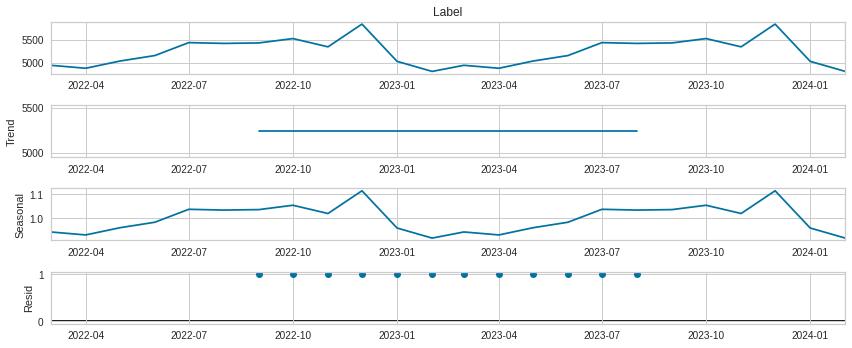

In [ ]:
# Import para visualizar a sazonalidade dos dados
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(predictions_future['Label'], model='multiplicative')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

In [ ]:
modelos = models()

In [ ]:
modelos["Name"]

ID
lr                          Linear Regression
lasso                        Lasso Regression
ridge                        Ridge Regression
en                                Elastic Net
lar                    Least Angle Regression
llar             Lasso Least Angle Regression
omp               Orthogonal Matching Pursuit
br                             Bayesian Ridge
ard         Automatic Relevance Determination
par              Passive Aggressive Regressor
ransac                Random Sample Consensus
tr                         TheilSen Regressor
huber                         Huber Regressor
kr                               Kernel Ridge
svm                 Support Vector Regression
knn                     K Neighbors Regressor
dt                    Decision Tree Regressor
rf                    Random Forest Regressor
et                      Extra Trees Regressor
ada                        AdaBoost Regressor
gbr               Gradient Boosting Regressor
mlp                            